In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

[02/04/23 15:19:32] WARNING  C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\plotly\expr ]8;id=353709;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=410873;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             ess\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated                
                             alias for `np.bool_`.  (Deprecated NumPy 1.24)                                        
                               np.bool8: (False, True),                                                            
                                                                                                                   

In [2]:
df = catalog.load("MICRODADOS_ENEM")

                    INFO     Loading data from 'MICRODADOS_ENEM' (ParquetDataSet)...            ]8;id=283211;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=220645;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_MUNICIPIO_ESC,TP_PRESENCA_MT,TP_ESCOLA,TP_ENSINO,NU_NOTA_MT
0,210053865474,2021,1,0,NaN,0.0,1,NaN,NaN
1,210052384164,2021,1,0,NaN,1.0,1,NaN,461.5
2,210052589243,2021,1,0,NaN,0.0,1,NaN,NaN
3,210052128335,2021,2,0,2304202.0,1.0,2,1.0,659.5
4,210051353021,2021,2,0,2311603.0,1.0,2,1.0,582.6


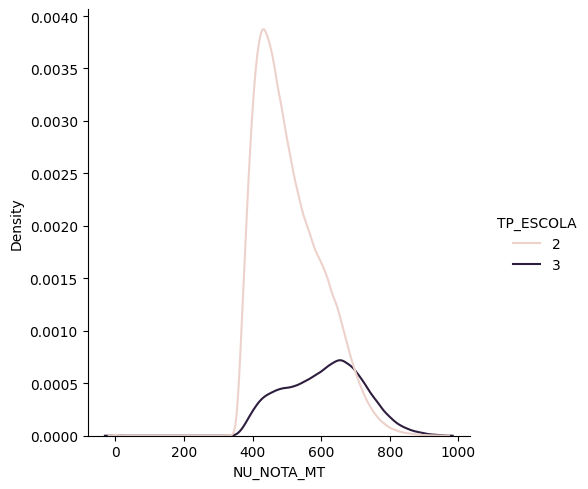

In [4]:
sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"), x="NU_NOTA_MT", hue="TP_ESCOLA", kind="kde");

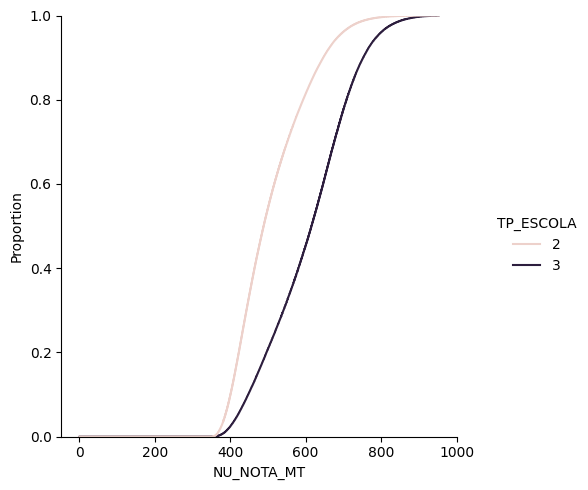

In [5]:
sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"), x="NU_NOTA_MT", hue="TP_ESCOLA", kind="ecdf");